# **Khởi tạo**

**Import thư viện**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Xử lý dữ liệu**

In [9]:
def read_file(file_name):
    data = pd.read_csv(file_name)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    data['Price'] = data['Price'].str.replace(',', '').astype(float)
    # Tiền xử lý các cột khác nếu cần thiết

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    data.sort_index(inplace=True)

    return data

**Xây dựng mô hình**

In [13]:
def LinearRegression_prediction(name, data, train_test_ratio=0.8):
    
    # Tính toán số lượng điểm dữ liệu cho tập train và tập test
    train_size = int(len(data) * train_test_ratio)

    # Tạo tập train và tập test
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    # Tạo features và target cho tập train và tập test
    X_train, y_train = np.array(range(train_size)).reshape(-1, 1), train['Price'].values
    X_test, y_test = np.array(range(train_size, len(data))).reshape(-1, 1), test['Price'].values

    # Xây dựng mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán giá trên tập test
    y_pred_test = model.predict(X_test)

    # Dự đoán giá cho 30 ngày tiếp theo
    next_30_days_index = np.arange(len(data), len(data) + 30).reshape(-1, 1)
    y_pred_next_30_days = model.predict(next_30_days_index)
    

    # Trực quan hóa kết quả
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[:train_size], train['Price'], color='blue', label='Train Data')
    plt.plot(data.index[train_size:], test['Price'], color='orange', label='Test Data')
    plt.plot(data.index[train_size:], y_pred_test, color='green', label='Predictions on Test Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=30), y_pred_next_30_days[-30:], color='red', label='Predictions for Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Linear Regression {} ({})'.format(train_test_ratio, name))
    plt.legend()
    plt.show()

# **BIDV**

In [16]:
data = read_file("../Dataset/BID Historical Data.csv");
name = 'BIDV'

**BIDV 7:3**

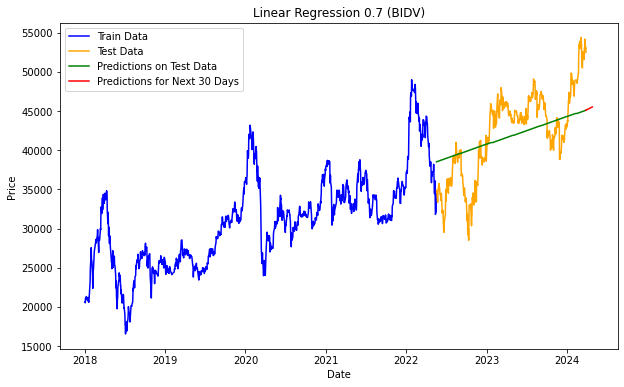

In [17]:
LinearRegression_prediction(name, data, 0.7)

**BIDV 8:2**

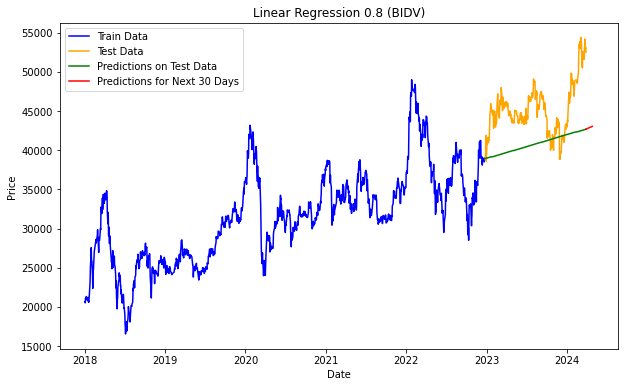

In [18]:
LinearRegression_prediction(name, data, 0.8)

**BIDV 9:1**

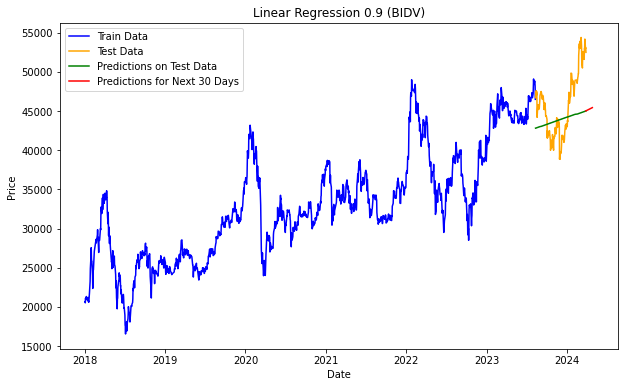

In [19]:
LinearRegression_prediction(name, data, 0.9)

# **VCB**

In [20]:
data = read_file("../Dataset/VCB Historical Data.csv");
name = 'VCB'

**VCB 7:3**

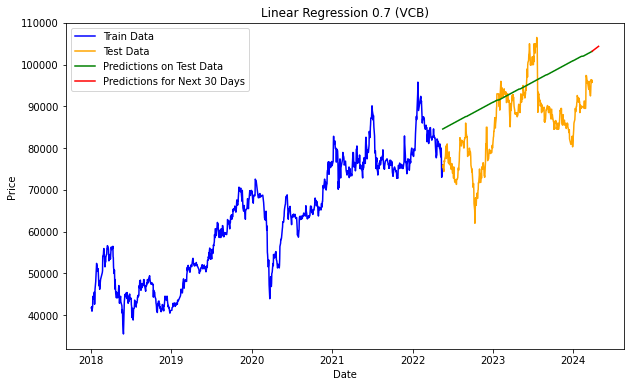

In [21]:
LinearRegression_prediction(name, data, 0.7)

**VCB 8:2**

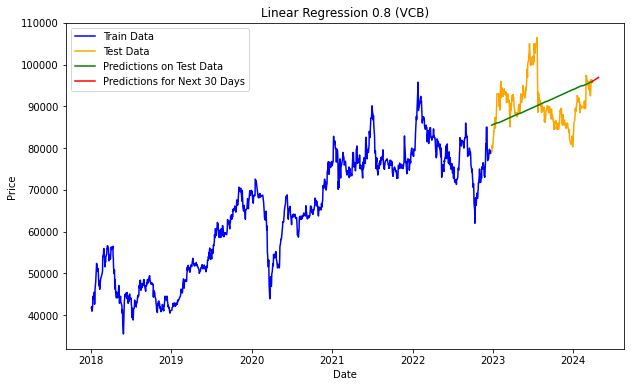

In [22]:
LinearRegression_prediction(name, data, 0.8)

**VCB 9:1**

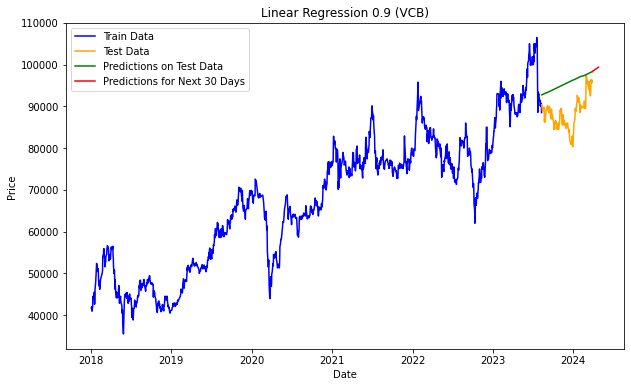

In [23]:
LinearRegression_prediction(name, data, 0.9)

# **MBB**

In [25]:
data = read_file("../Dataset/MBB Historical Data.csv");
name = 'MBB'

**MBB 7:3**

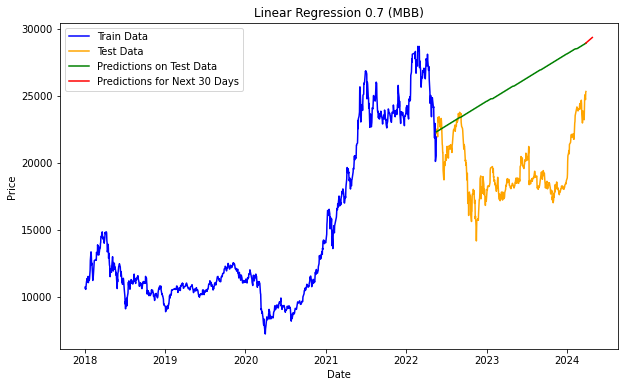

In [26]:
LinearRegression_prediction(name, data, 0.7)

**MBB 8:2**

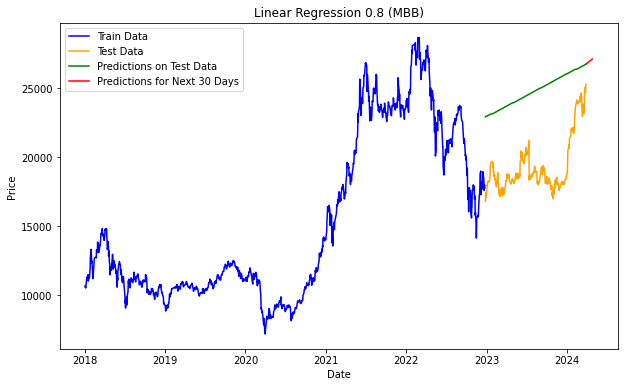

In [27]:
LinearRegression_prediction(name, data, 0.8)

**MBB 9:1**

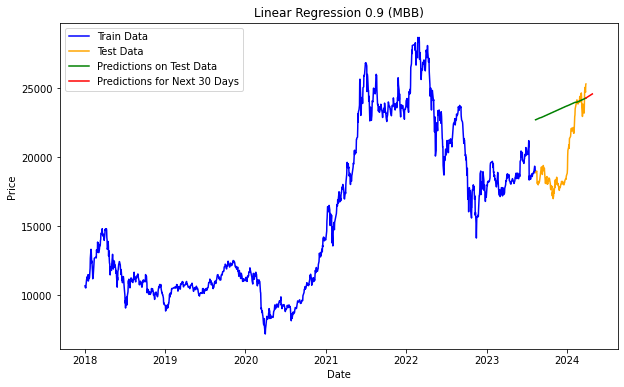

In [28]:
LinearRegression_prediction(name, data, 0.9)